<a href="https://colab.research.google.com/github/RamyaDobbala/ExcelR-Solutions---NLP/blob/main/25_1_25_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df['Rating'].value_counts()

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


In [ ]:
def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

In [ ]:
df['Rating'] = df['Rating'].apply(ratings)

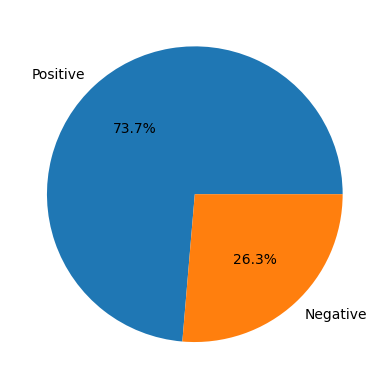

In [ ]:
plt.pie(df['Rating'].value_counts(),
        labels=df['Rating'].unique().tolist(),
        autopct='%1.1f%%')
plt.show()

***Character Count**


In [ ]:
lenght = len(df['Review'][0])
print(f'Lenght of a sample review is {lenght}')

Lenght of a sample review is 593


In [ ]:
df['Length'] = df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281


***** Word Count: Number of words in a Review****

In [ ]:
word_count = len(df['Review'][0].split())
print(f'Word count of a sample review is {word_count}')

Word count of a sample review is 87


In [ ]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [ ]:
df['Word_count'] = df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191


***Mean word Length***

In [ ]:
df['mean_word_length'] = df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571


***Mean sentence length**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [8]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
def clean(review):
  review = review.lower()
  review = re.sub('[^a-z A-Z 0-9-]+','', review)
  review = "".join([word for word in review.split() if word not in stopwords.words('english')])
  return review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
df['Review'] = df['Review'].apply(clean)
df.head()

,Review,Rating,Review_lists
0,nicehotelexpensiveparkinggotgooddealstayhotela...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,oknothingspecialchargediamondmemberhiltondecid...,2,"[ok, nothing, special, charge, diamond, member..."
2,nicerooms4experiencehotelmonacoseattlegoodhote...,3,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,uniquegreatstaywonderfultimehotelmonacolocatio...,5,"[unique,, great, stay,, wonderful, time, hotel..."
4,greatstaygreatstaywentseahawkgameawesomedownfa...,5,"[great, stay, great, stay,, went, seahawk, gam..."


In [10]:
def corpus(text):
  text_list = text.split()
  return text_list

In [11]:
df['Review_lists'] = df['Review'].apply(corpus)
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,"unique, great stay, wonderful time hotel monac...",5,"[unique,, great, stay,, wonderful, time, hotel..."
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay,, went, seahawk, gam..."


In [13]:
from tqdm import trange
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
  corpus += df['Review_lists'][i]
len(corpus)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 116704.62it/s]


2138765

In [14]:
from collections import Counter
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 42079),
 ('not', 30750),
 ('room', 30532),
 ('great', 18732),
 ("n't", 18436),
 ('staff', 14950),
 ('good', 14791),
 ('did', 13433),
 ('just', 12458),
 ('stay', 11376)]

In [15]:
words = []
freq = []
for word, count in mostCommon:
  words.append(word)
  freq.append(count)

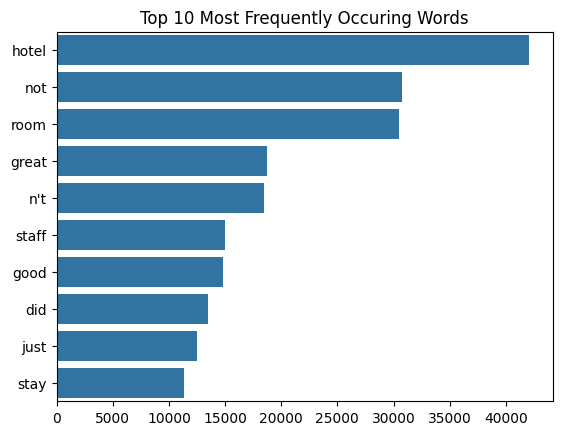

In [16]:
import seaborn as sns
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()